# Processo de Importação de Bibliotecas Necessárias #####

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns
from datetime import datetime

#!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()


# Processo de Instalação do Pandas DataReader #####

In [2]:
# Instalação do Pandas DataReader
# pip install pandas_datareader

# Processo de Definição de Variáveis #####

In [3]:
# Diretorio que contém informações da carteira de ativos
diretorioArquivoEmpresasMoedas  = 'C:\\Temp\\MercadoFinanceiro\\Python\\Ativos\\ativos.xlsx'
# Diretório onde será salvo o arquivo 
diretorioArquivoAtivo = 'C:\\Temp\\MercadoFinanceiro\\Python\\AcompanhamentoAtivo'
# Extensão do Arquivo
extensao  = 'csv'
# Período Inicial
dataInicio = '2019-01-01'
# Período Final
data_e_hora_atuais = datetime.now()
dataFim = data_e_hora_atuais.strftime('%Y-%m-%d')

# Processo de Importação da Carteira de Ativos #####

In [4]:
nomeArquivo = pd.read_excel(diretorioArquivoEmpresasMoedas,header=0)
nomeArquivo.sort_index(ascending=False,inplace=True)
nomeArquivo

,Ativo
0,AMER3.SA


# Processo de Busca no Yahoo Finances das Informações de Nossa Carteira

In [5]:
df = pd.DataFrame()

for ativo in list(nomeArquivo['Ativo']):
    # Nome do ativo
    nomeAtivo = ativo
    # Captura das Informações do Yahoo e informação de periodo inicial e final
    dfYF = web.get_data_yahoo(f'{nomeAtivo}', start=f'{dataInicio}', end=f'{dataFim}')
    # Inclusão de Colunas Data da Extração e Ativo
    dfYF = dfYF.assign(DataExtracao=data_e_hora_atuais.strftime('%Y-%m-%d %H:%M:%S.%f'),AcaoMoeda=nomeAtivo)
    df = df.append(dfYF)
    # Comando para salvar o arquivo
    df.to_csv(diretorioArquivoAtivo+'\\'+nomeAtivo+'.'+extensao)

[*********************100%***********************]  1 of 1 completed


C:\Users\lacer\AppData\Local\Temp\ipykernel_19512\3372698632.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(dfYF)


In [6]:


arquivo = diretorioArquivoAtivo+'\\'+nomeAtivo+'.'+extensao
dfGeral = pd.read_csv(arquivo)

dfGeral['AnoMes'] = dfGeral['Date'].str[:7]

dfGeral['Ano'] = dfGeral['Date'].str[:4]

df2023 = dfGeral[dfGeral['Date'].str[:7]=='2023-01']

df2023.reset_index(drop=True, inplace=True)


# Valor Médio Anual da AMER3.SA Negociado em R$

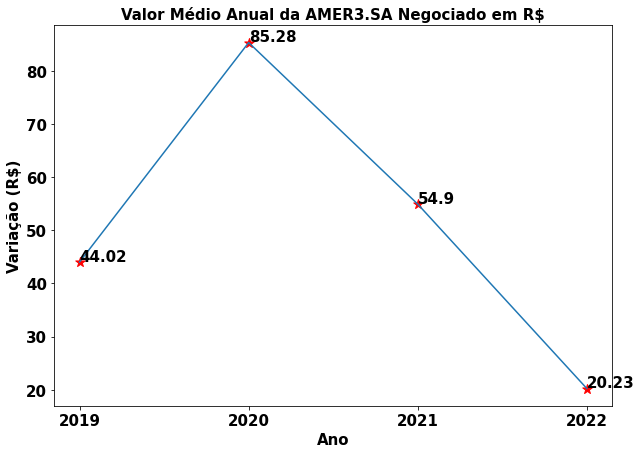

In [7]:


dfHistorico = dfGeral[dfGeral['Ano'].isin(['2019','2020','2021','2022'])].groupby(['Ano'],as_index=False).agg(VlrMedio=('Close','mean'))

dfHistorico['PercEvolucao'] = dfHistorico['VlrMedio'].pct_change().fillna(0)

dfHistorico


plt.title('Valor Médio Anual da AMER3.SA Negociado em R$', color='black', fontsize=15, fontweight='bold')
plt.xlabel("Ano" , color='black', fontsize=15, fontweight='bold') 
plt.ylabel("Variação (R$)", color='black', fontsize=15, fontweight='bold')
dfHistorico['VlrMedio'].plot(figsize = (10, 7))
plt.rcParams["figure.autolayout"] = True
x = dfHistorico['Ano']
y = dfHistorico['VlrMedio']
plt.scatter(x, y, label = "Rendimento", color = "r", marker = "*", s = 100)
for i in range(len(x)):
    plt.annotate(round(y[i],2), (x[i], y[i]+0.2), fontsize=15, fontweight='bold')
plt.xticks(rotation=0, fontsize=15 , fontweight='bold' , color='black')
plt.yticks(rotation=0, fontsize=15 , fontweight='bold' , color='black')
#plt.grid()
plt.show()

# Análise de Valorização das AMER3.SA em Percentual

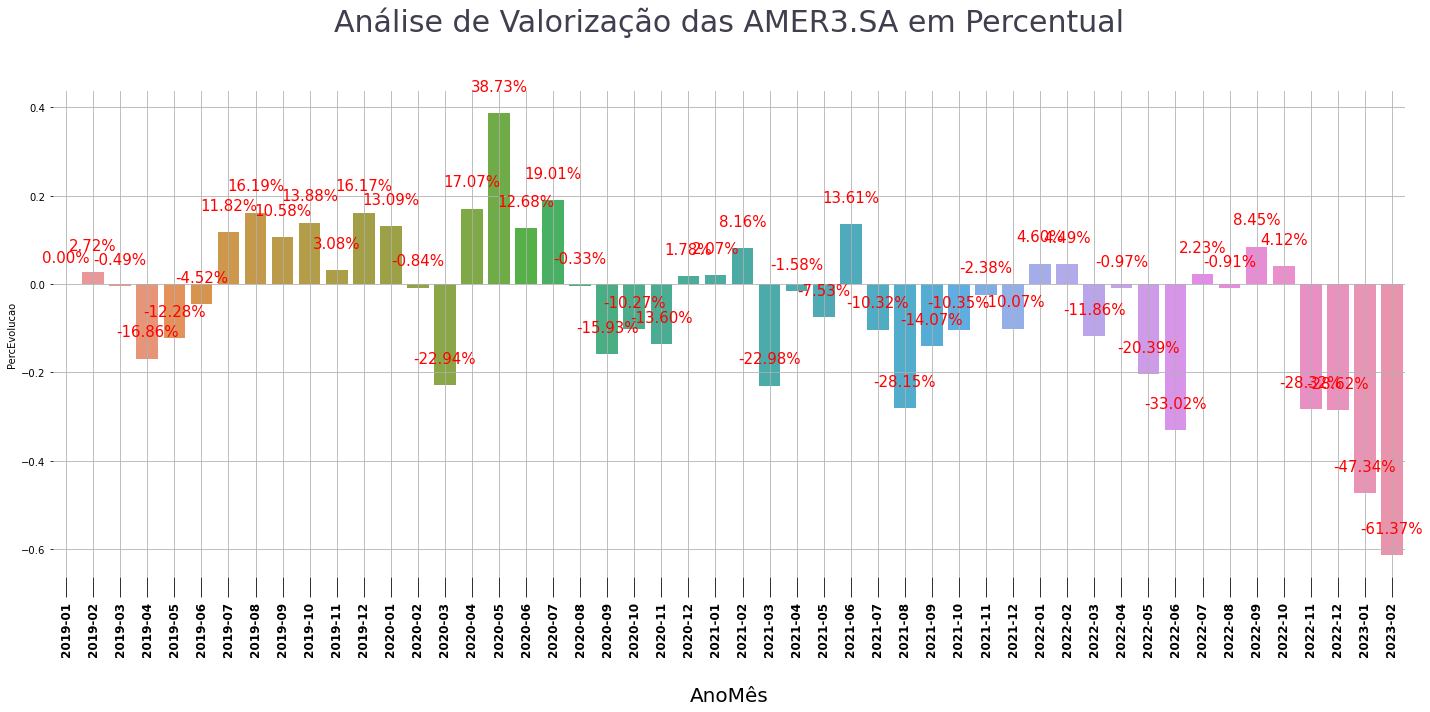

In [8]:

df3 = dfGeral.groupby(['AnoMes'],as_index=False).agg(VlrMedio=('Close','mean'))

df3['PercEvolucao'] = df3['VlrMedio'].pct_change().fillna(0)

# GERAÇÃO DO GRÁFICO

#criando a fig e o ax no matplotlib
fig, ax = plt.subplots(figsize=(20,10))

sns.barplot(  x = df3['AnoMes']
            , y = df3['PercEvolucao']
           )

#modificação do fundo
ax.set_frame_on(False)

#adicionando um título
ax.set_title('Análise de Valorização das AMER3.SA em Percentual',loc='center',pad=60,fontdict={'fontsize':30},color='#3f3f4e')

#retirando o eixo y
ax.get_yaxis().set_visible(True)

#retirnado os ticks do eixo x
ax.tick_params(axis='x',length=20,labelsize=20,colors='black')

#ajustando o título do gráfico
ax.set_xlabel('AnoMês',labelpad=30,fontdict={'fontsize':20},color='black')

for retangulo in ax.patches:
    ax.text(retangulo.get_x() + retangulo.get_width() / 2,
          retangulo.get_height()+0.05,
          str('{:.2f}'.format(float(retangulo.get_height())*100).replace(',','.'))+'%',
          ha ='center',
          fontsize=15,
          color='red')
    
#plotando o gráfico
plt.xticks(rotation=90, fontsize=12 , fontweight='bold' , color='black')
plt.grid()
plt.show()

# Valor Médio AMER3.SA Negociado em R$

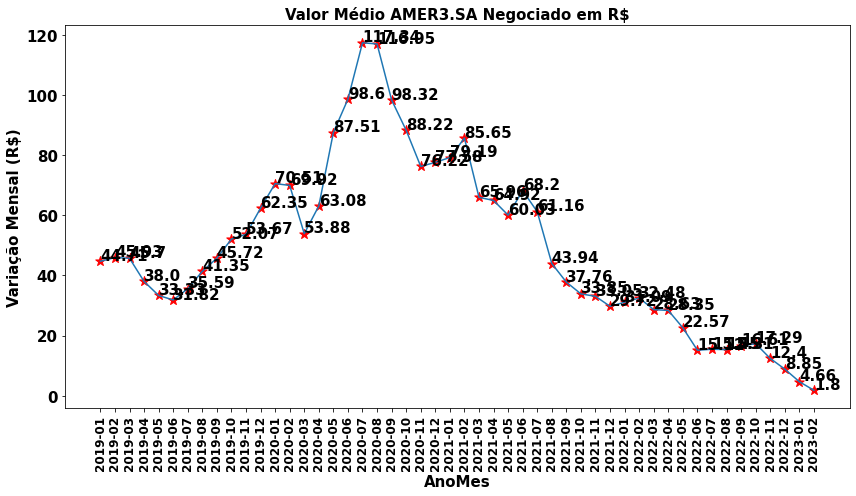

In [9]:
plt.title('Valor Médio AMER3.SA Negociado em R$', color='black', fontsize=15, fontweight='bold') 
plt.xlabel("AnoMes", color='black', fontsize=15, fontweight='bold') 
plt.ylabel("Variação Mensal (R$)", color='black', fontsize=15, fontweight='bold') 
df3['VlrMedio'].plot(figsize = (12, 7))
plt.rcParams["figure.autolayout"] = True
x = df3['AnoMes']
y = df3['VlrMedio']
plt.scatter(x, y, label = "Rendimento", color = "r", marker = "*", s = 100)
for i in range(len(x)):
    plt.annotate(round(y[i],2), (x[i], y[i]+0.4), color='black', fontsize=15, fontweight='bold') 
plt.xticks(rotation=90, fontsize=12 , fontweight='bold' , color='black')
plt.yticks(rotation=0, fontsize=15 , fontweight='bold' , color='black')
#plt.grid()
plt.show()

# AMER3.SA em Real Jan2023

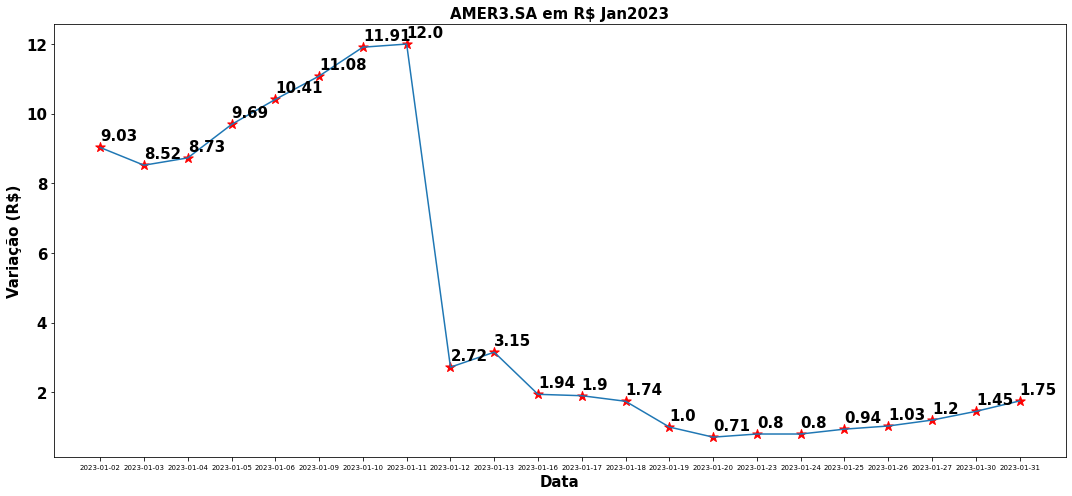

In [10]:
plt.title('AMER3.SA em R$ Jan2023', color='black', fontsize=15, fontweight='bold') 
plt.xlabel("Data", color='black', fontsize=15, fontweight='bold') 
plt.ylabel("Variação (R$)", color='black', fontsize=15, fontweight='bold') 
df2023['Close'].plot(figsize = (15, 7))
plt.rcParams["figure.autolayout"] = False
x = df2023['Date'].str[:10]
y = df2023['Close']
plt.scatter(x, y, label = "Rendimento", color = "r", marker = "*", s = 100)
for i in range(len(x)):
    plt.annotate(round(y[i],2), (x[i], y[i]+0.2), color='black', fontsize=15, fontweight='bold') 

plt.xticks(rotation=75)
#plt.grid()
plt.xticks(rotation=0, fontsize=7 , fontweight='normal' , color='black')
plt.yticks(rotation=0, fontsize=15 , fontweight='bold' , color='black')

plt.show()

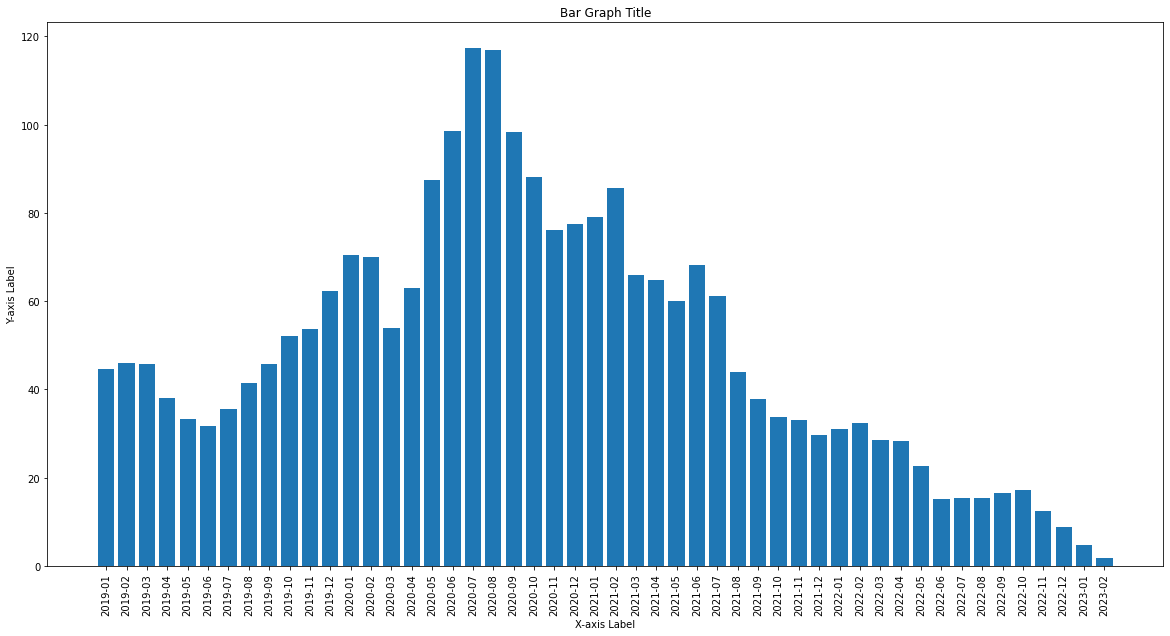

In [11]:

import matplotlib.pyplot as plt

x = df3['AnoMes']
y = df3['VlrMedio']

fig, ax = plt.subplots(figsize=(20,10))
ax.bar(x, y)
ax.set_xlabel('X-axis Label')
ax.set_ylabel('Y-axis Label')
ax.set_title('Bar Graph Title')
plt.xticks(rotation=90)
plt.show()
